Problem 6.11. Nambe Mills, Santa Fe, New Mexico [2, 7], is a tableware manufacturer.
After casting, items produced by Nambe Mills are shaped, ground, buffed, and
polished. In 1989, as an aid to rationalizing production of its 100 products, the
company recorded the total grinding and polishing times and the diameter of
each item (Table 5.3; data set: nambeware). In this problem, only consider the
item price y and the item diameter x. In Problem 5.26, a glm was proposed
for these data.

1. Fit this GLM using R, and write down the fitted model.
2. Determine the standard error for each regression parameter.
3. Compute the residual deviance.
4. Compute the mean deviance estimate of φ.
5. Compute the Pearson estimate of φ.

## Your turn: Home work:

Problem 7.5. from: Peter K. Dunn · Gordon K. Smyth
Generalized Linear Models With Examples in R
https://link.springer.com/content/pdf/10.1007/978-1-4419-0118-7.pdf

Nambe Mills, Santa Fe, New Mexico, is a tableware manufacturer. After casting, items produced by Nambe Mills are shaped, ground, buffed, and
polished. In 1989, as an aid to rationalizing production of its 100 products, the company recorded the total grinding and polishing times and the diameter of each item (data set: nambeware). In this problem, only consider the item price y and item diameter x. In Problem 6.11, a glm was fitted to these data.

1. Use a Wald test to determine if diameter is significant.
2. Use a score test to determine if diameter is significant.
3. Use a likelihood ratio test to determine if diameter is significant.
296 REFERENCES
4. Compare the results from the Wald, score and likelihood ratio tests. Comment.
5. Is the saddlepoint approximation expected to be accurate? Explain.
6. Is the Central Limit Theorem expected to be accurate? Explain.
7. Find the 95% Wald confidence intervals for the regression coefficients.
8. Plot the price against diameter, and show the relationship described by
the fitted model. Also plot the lines indicating the lower and upper 95%
confidence intervals for these fitted value

In [9]:
library(tidyverse)
library(lubridate)
library(MASS)

#For sure: set dplyr functions
select    <- dplyr::select;
rename    <- dplyr::rename;
mutate    <- dplyr::mutate; 
summarize <- dplyr::summarize;
arrange   <- dplyr::arrange;
slice     <- dplyr::slice;
filter    <- dplyr::filter;
recode    <- dplyr::recode

install.packages("GLMsData")
library(GLMsData)

install.packages("GGally")
library(GGally)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [7]:
data(nambeware)
head(nambeware)
summary(nambeware)
?nambeware

,Type,Diam,Time,Price
,<fct>,<dbl>,<dbl>,<dbl>
1,CassDish,10.7,47.65,144
2,CassDish,14.0,63.13,215
3,CassDish,9.0,58.76,105
4,Bowl,8.0,34.88,69
5,Dish,10.0,55.53,134
6,CassDish,10.5,43.14,129


       Type         Diam            Time            Price       
 Bowl    :23   Min.   : 5.00   Min.   : 12.02   Min.   : 21.50  
 CassDish:10   1st Qu.: 8.25   1st Qu.: 22.21   1st Qu.: 47.25  
 Dish    : 7   Median :11.00   Median : 31.46   Median : 75.00  
 Plate   : 9   Mean   :10.93   Mean   : 35.82   Mean   : 86.38  
 Tray    :10   3rd Qu.:13.00   3rd Qu.: 45.03   3rd Qu.:107.00  
               Max.   :25.00   Max.   :109.38   Max.   :260.00  

nambeware {GLMsData},R Documentation


`geom_smooth()` using formula 'y ~ x'



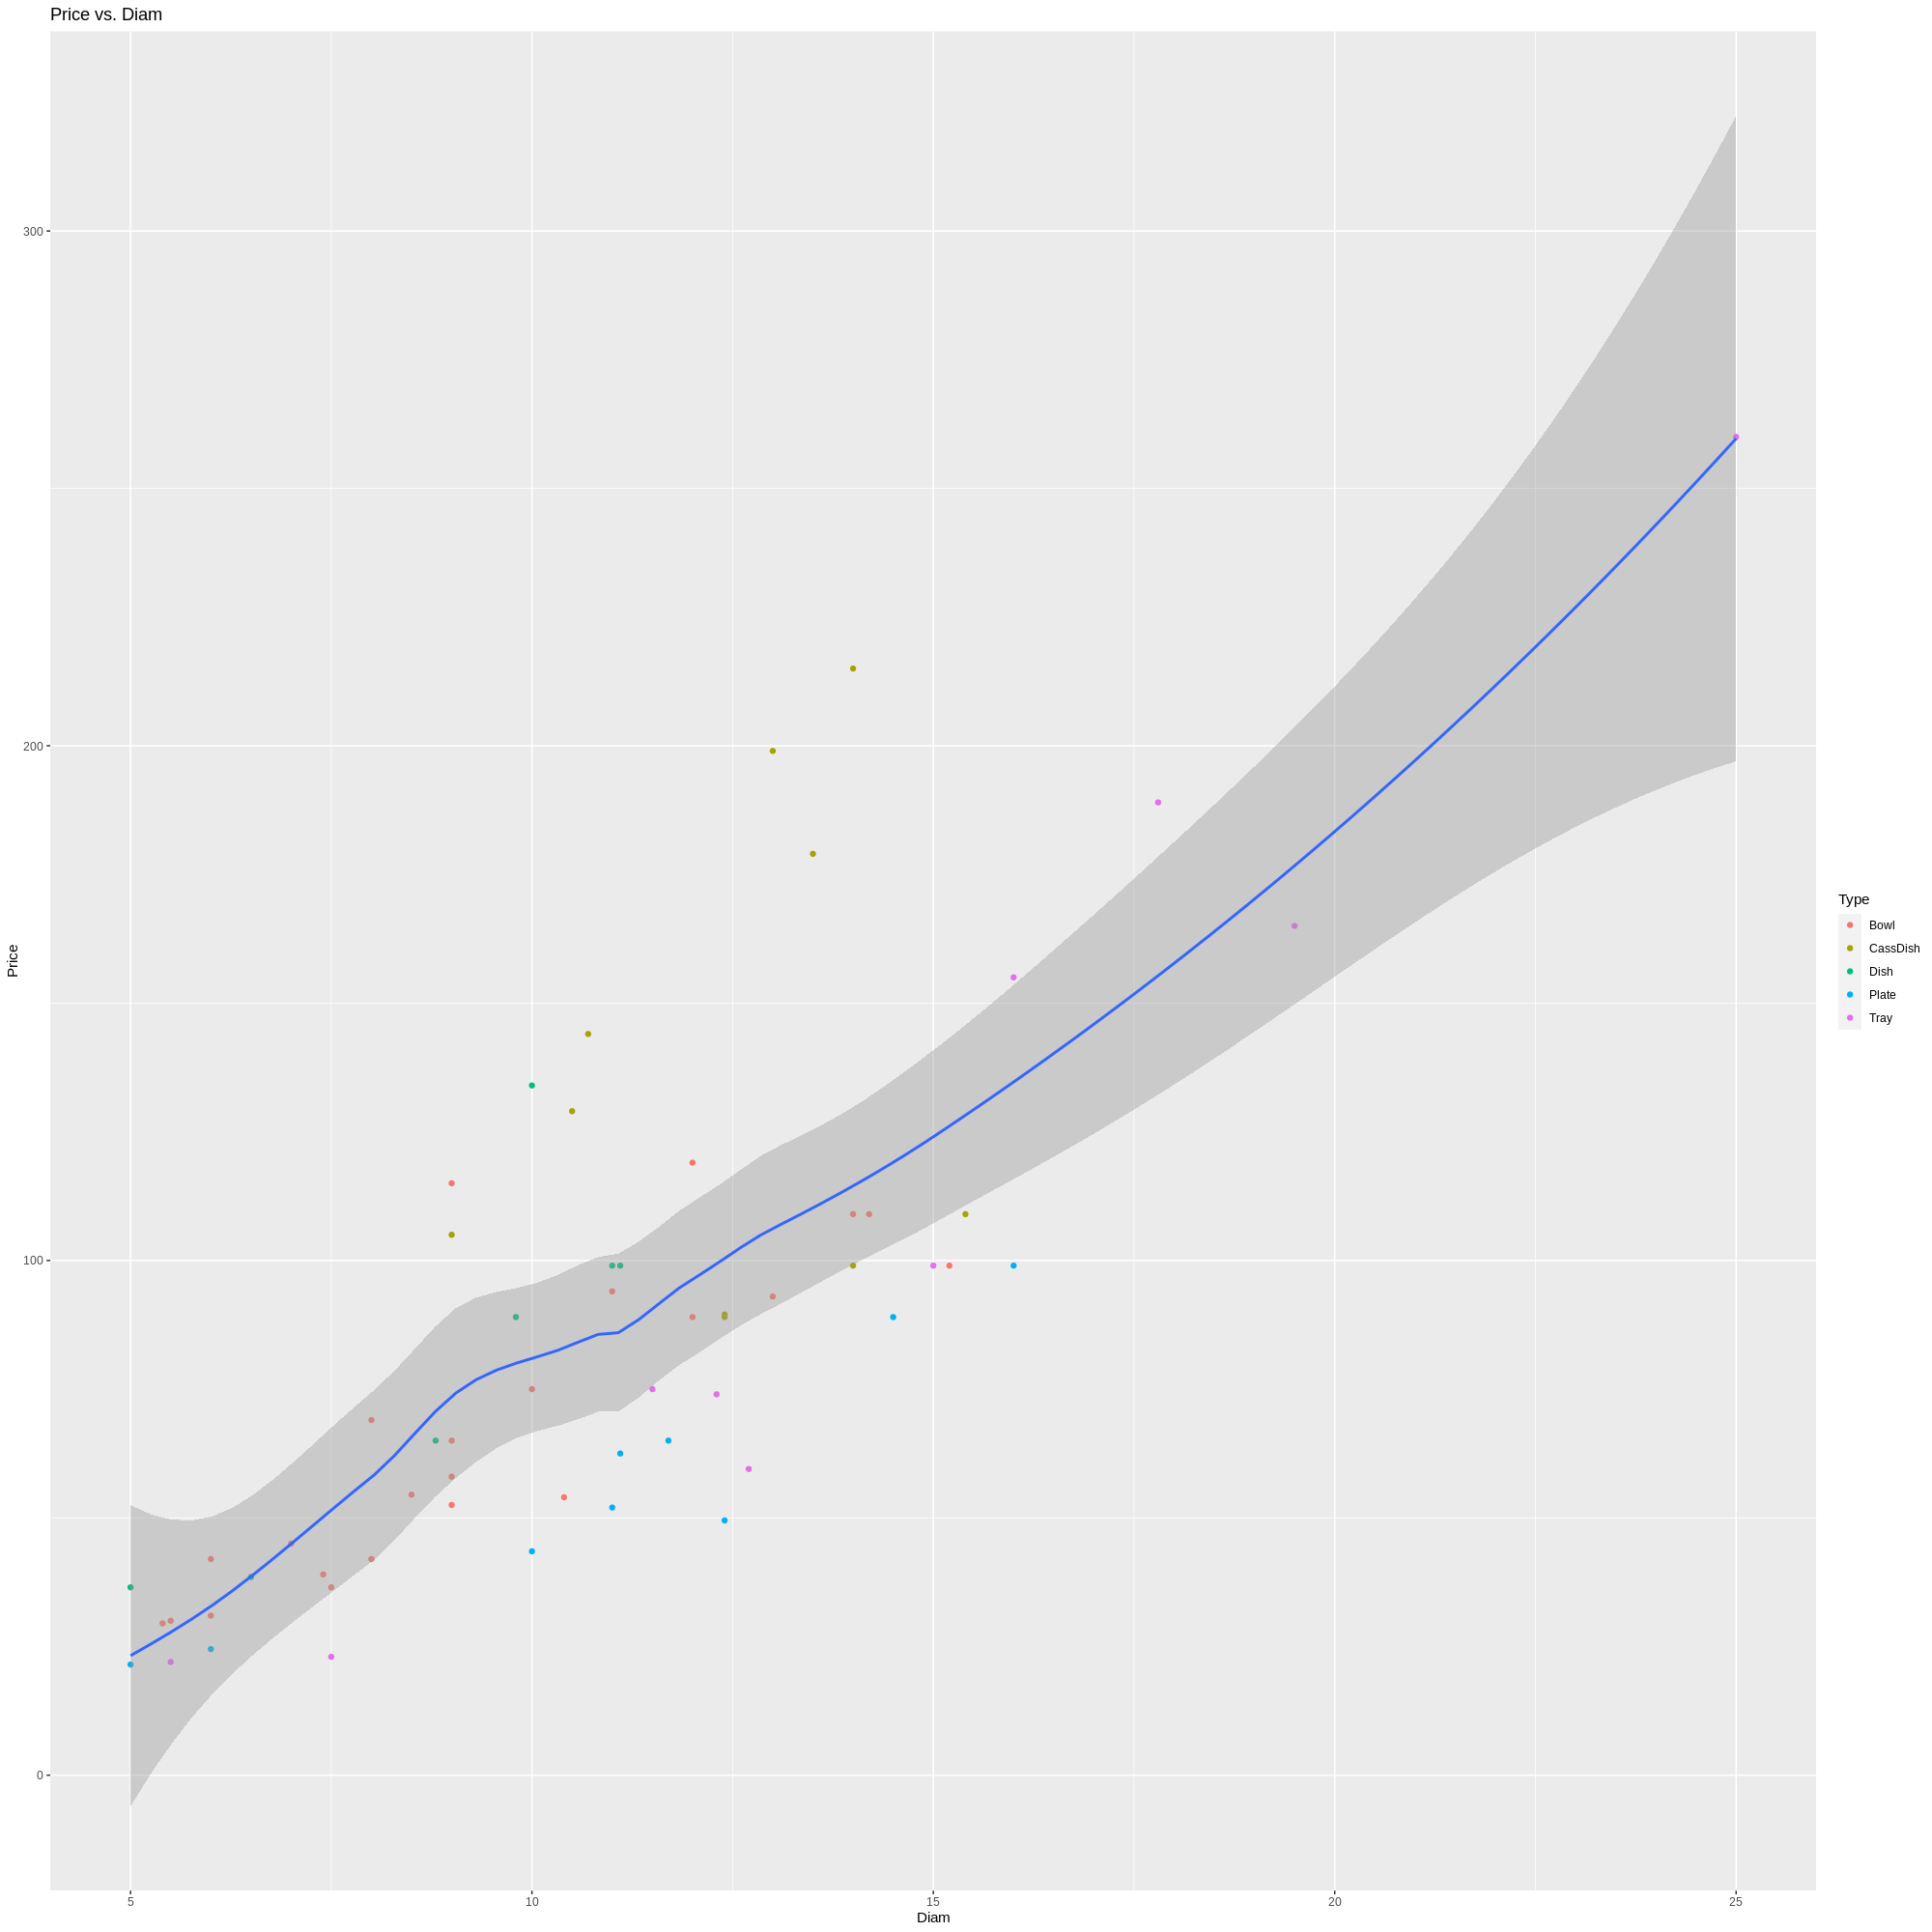

In [27]:
options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)
ggplot(nambeware, aes(x = Diam, y = Price)) + 
  geom_point(aes(colour = Type)) + 
  geom_smooth(method = "loess") +
  labs(title = "Price vs. Diam")


In [29]:
lm_model <- lm(Price ~ Diam, data=nambeware)
summary(model)


Call:
glm(formula = Price ~ Diam, data = nambeware)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-52.542  -18.763   -6.678   12.491   95.947  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -29.800     12.468  -2.390   0.0202 *  
Diam          10.632      1.077   9.871 6.03e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 998.7765)

    Null deviance: 154257  on 58  degrees of freedom
Residual deviance:  56930  on 57  degrees of freedom
AIC: 578.89

Number of Fisher Scoring iterations: 2


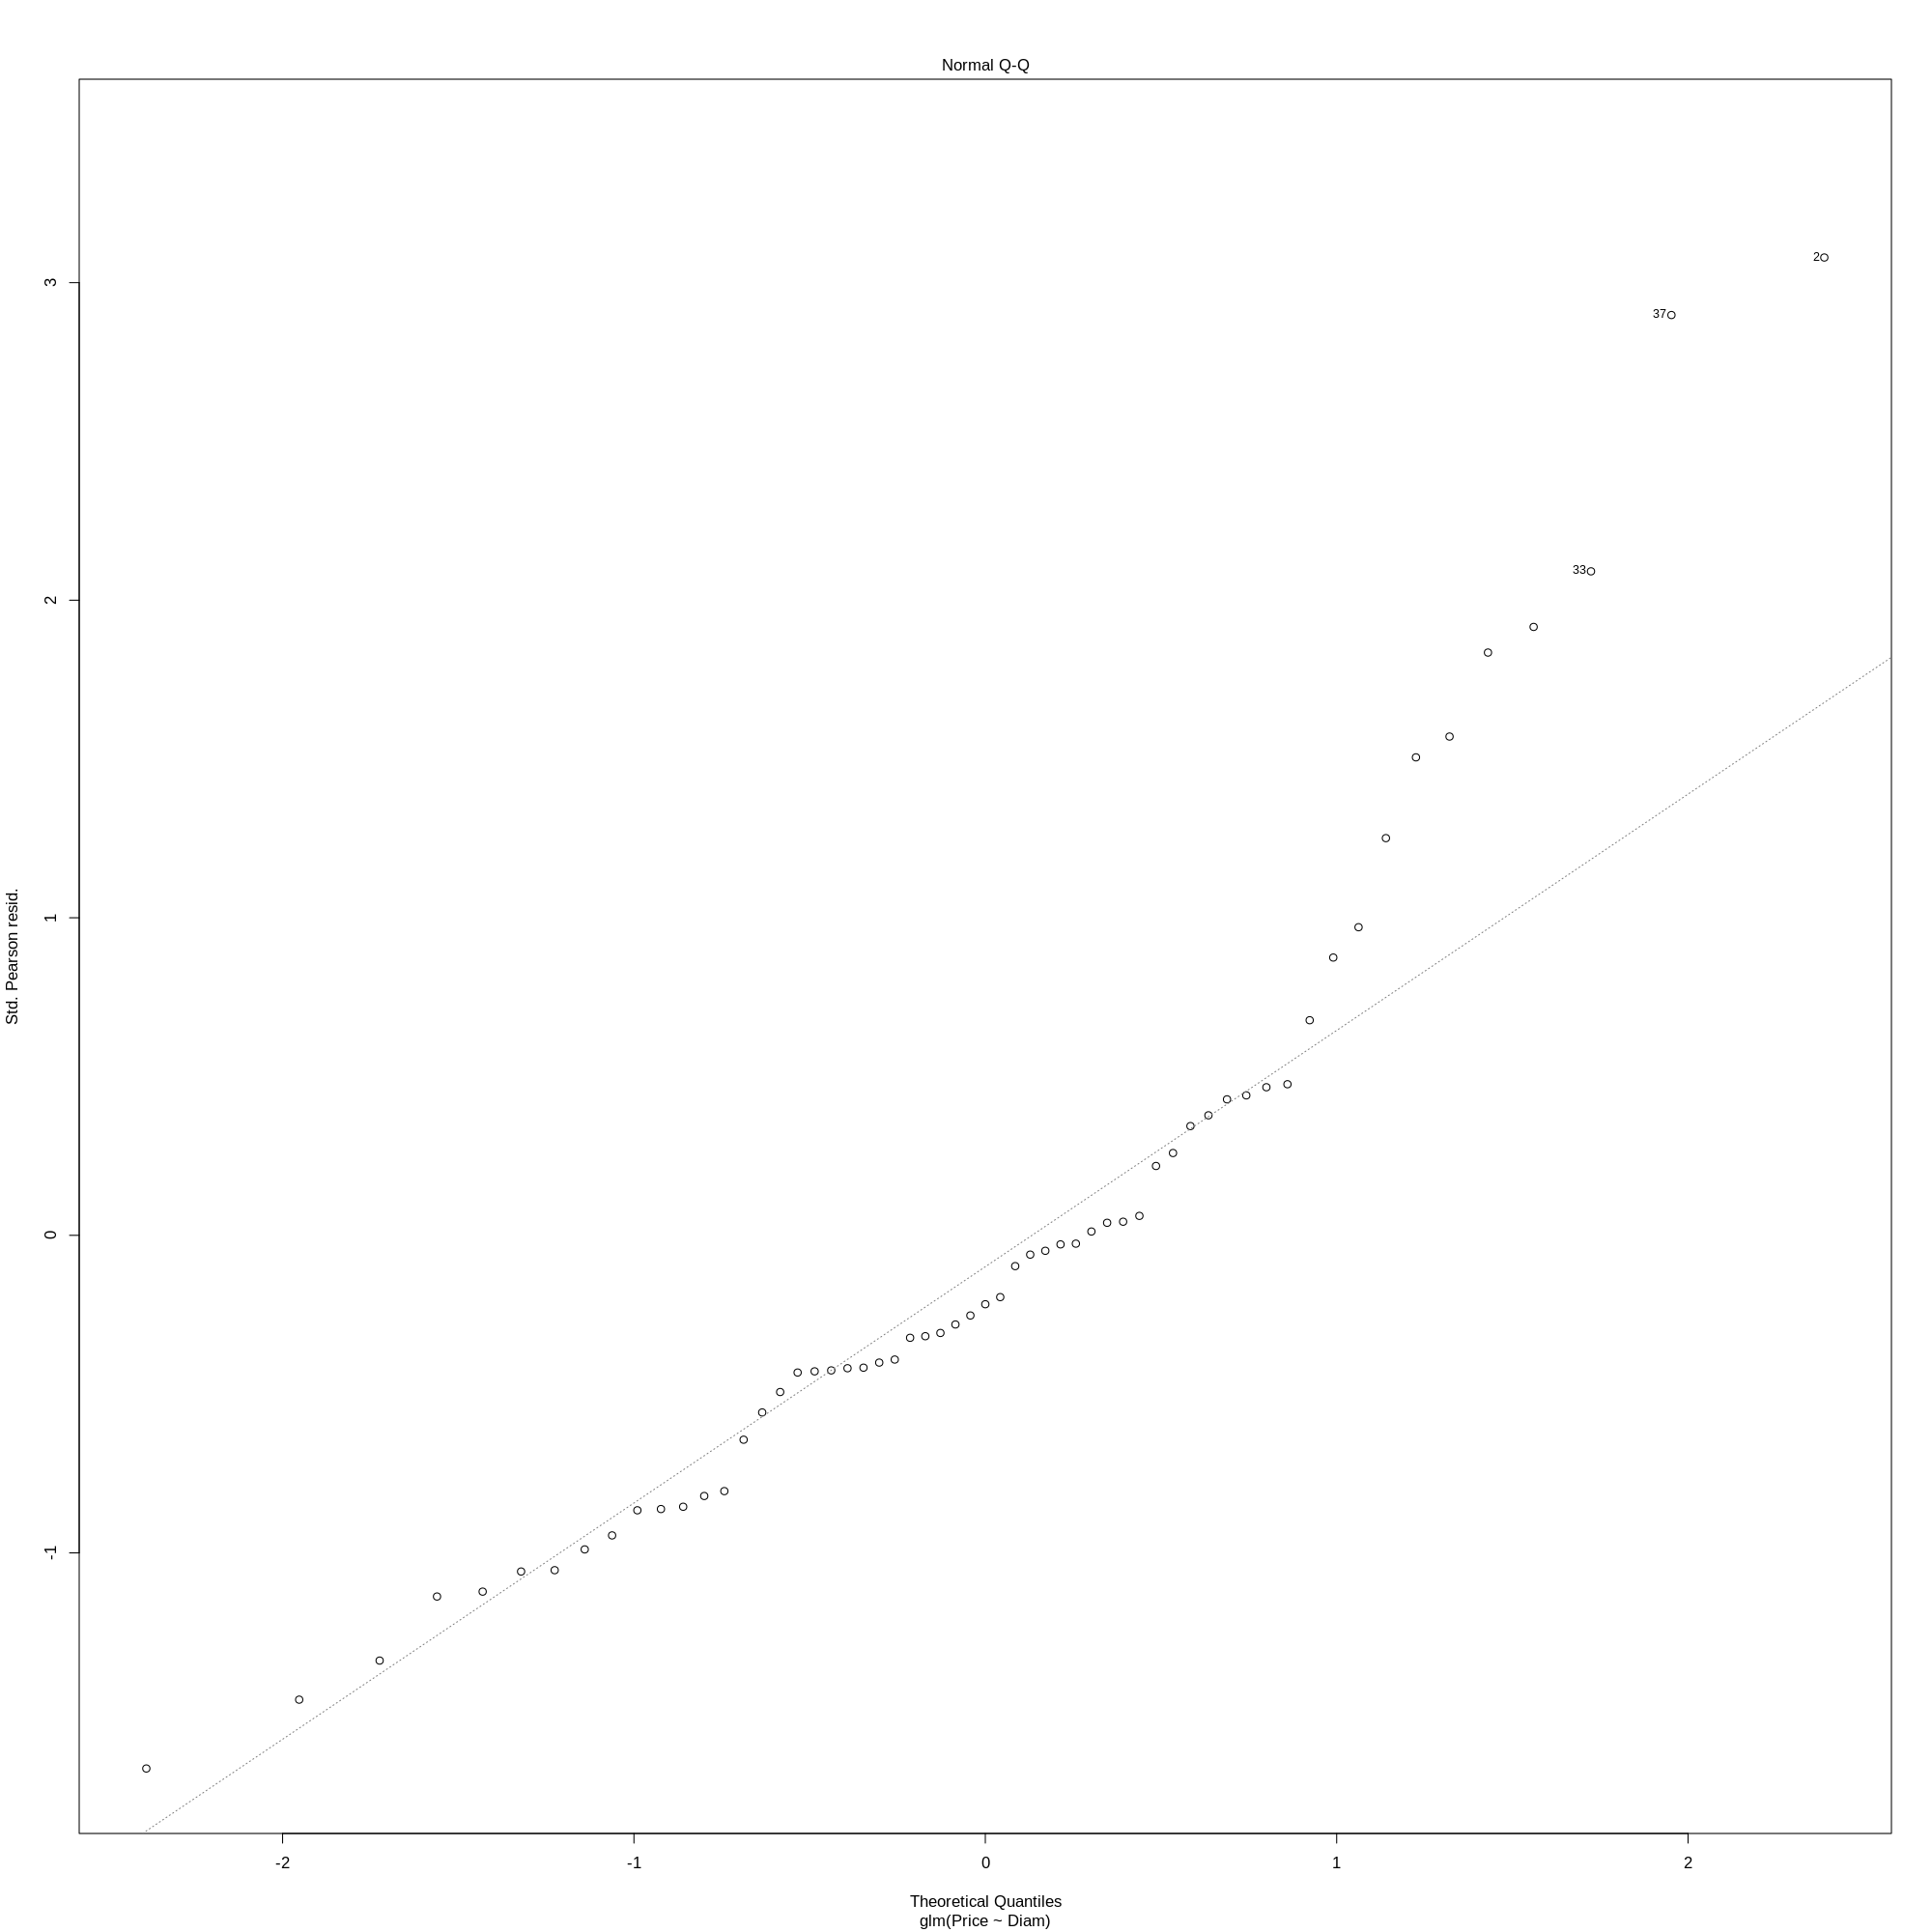

In [31]:
plot(model, which = 2)

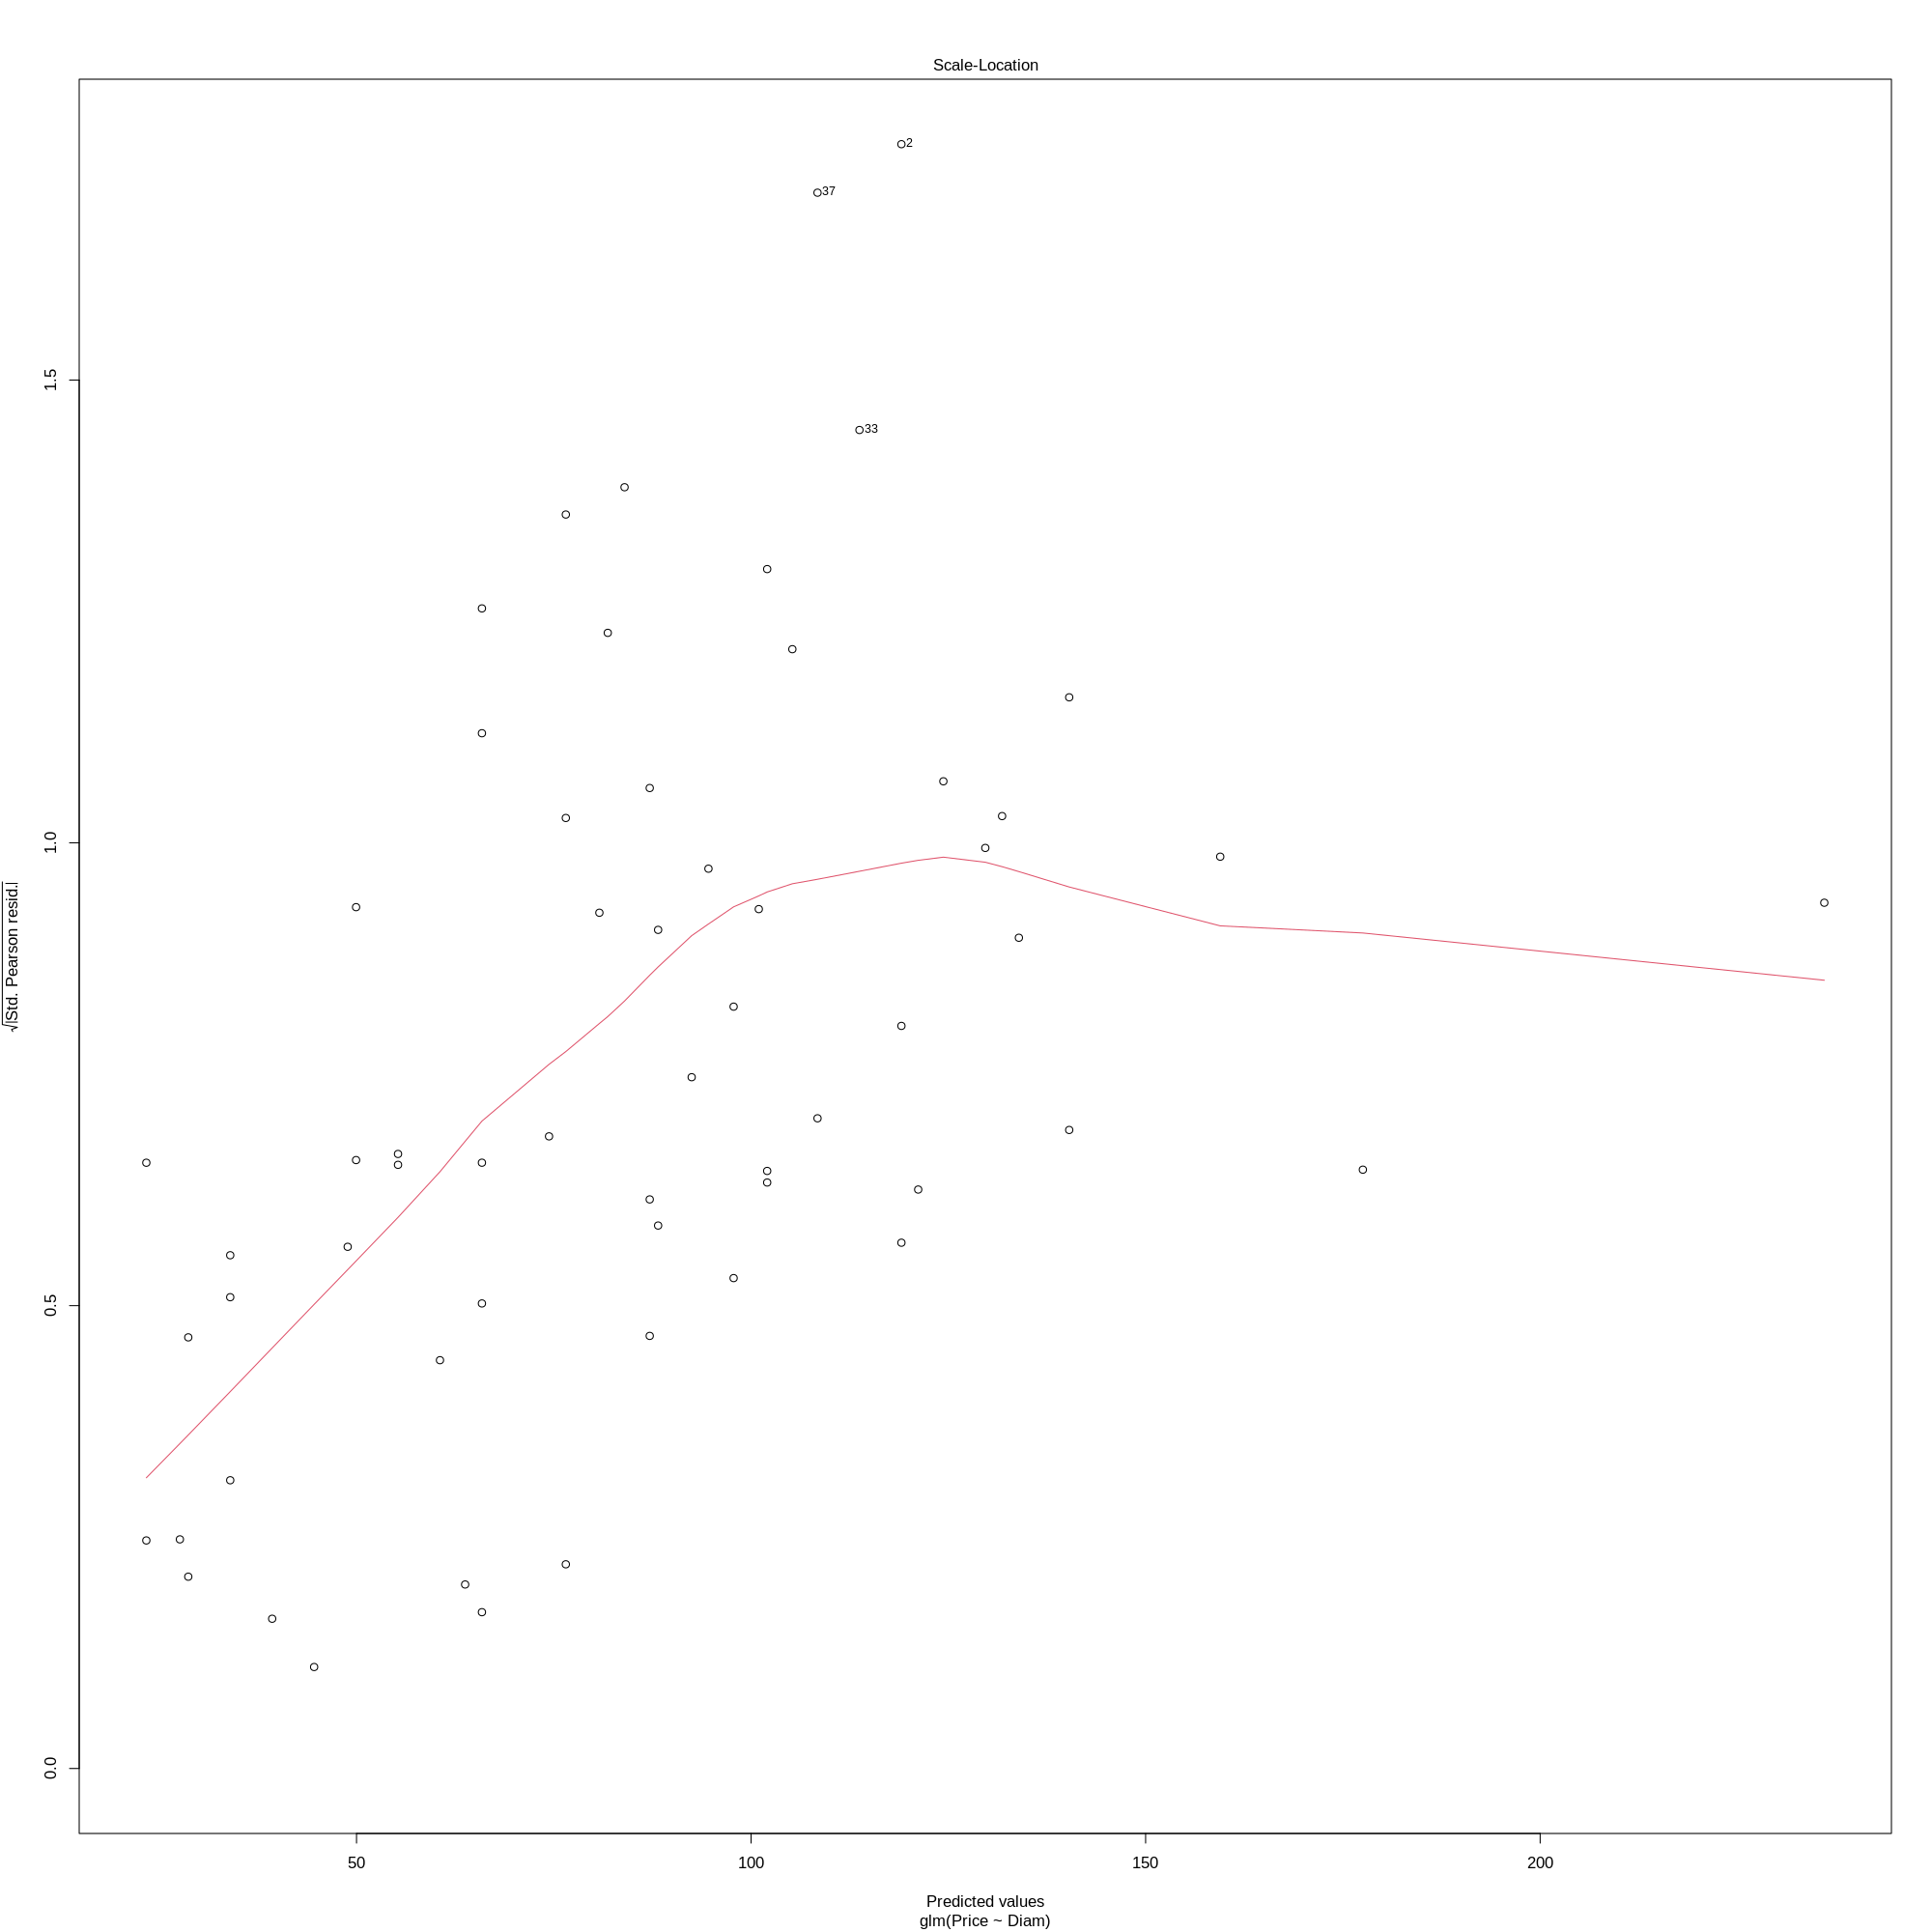

In [33]:
plot(model, which = 3)

In [34]:
model <- glm( Price ~ Diam,
                   data=nambeware,
                   family = Gamma(link = "identity")
)
summary(model)


Call:
glm(formula = Price ~ Diam, family = Gamma(link = "identity"), 
    data = nambeware)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.69423  -0.26800  -0.09864   0.12554   0.68095  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28.0414     7.4524  -3.763 0.000399 ***
Diam         10.4605     0.9378  11.154  5.9e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.1209578)

    Null deviance: 20.2679  on 58  degrees of freedom
Residual deviance:  6.3498  on 57  degrees of freedom
AIC: 548.84

Number of Fisher Scoring iterations: 5


In [42]:
cov_mat <- summary(model)$cov.scaled
round(cov_mat, digits=3)

,(Intercept),Diam
(Intercept),55.538,-6.545
Diam,-6.545,0.880


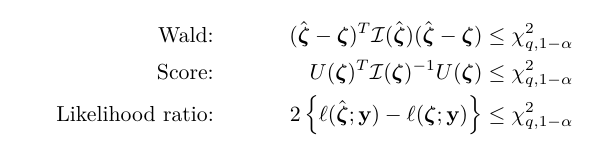

# Wald Test

In [61]:
install.packages("aod")
library(aod)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [63]:
coef(summary(model))
confint(model, "Diam")

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-28.04138,7.4523690,-3.762748,3.988946e-04
Diam,10.46051,0.9378226,11.154039,5.903376e-16


Waiting for profiling to be done...



2.5 %    97.5 % 
 8.674401 12.302710

In [74]:
wald.test(Sigma = vcov(model), b = coef(model), Terms = 1:1)

Wald test:
----------

Chi-squared test:
X2 = 14.2, df = 1, P(> X2) = 0.00017

# Score Test

In [56]:
install.packages("statmod") 
library(statmod)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [59]:
glm.scoretest(model, nambeware$Diam)

[1] 2.057665

In [76]:
p_val <- 2 * pnorm( abs(z_stat), lower.tail=FALSE)
p_val

[1] 0.0396223

# LR Test

In [80]:
model_0 <- glm( Price ~ 1, data=nambeware, family = Gamma(link = "identity"))
model_1 <- glm( Price ~ Diam, data=nambeware, family = Gamma(link = "identity"))

In [81]:
print(cbind( "Dev(m0)"= deviance(model_0), "Dev(m1)" = deviance(model_1) ))

print(cbind( "df(m0)" = df.residual(model_0), "df(m1)" = df.residual(model_1)))

L <- deviance(model_0) - deviance(model_1)
L

pchisq(L, df.residual(model_0) - df.residual(model_1), lower.tail=FALSE )

      Dev(m0)  Dev(m1)
[1,] 20.26787 6.349792
     df(m0) df(m1)
[1,]     58     57


[1] 13.91808

[1] 0.000190953

# Test comparison

The Wald and Score tests give similar p-values. We know that the Wald test is symetric and the Score and the LR tests are not symetric. All of the tests tell us however that the `Diam` parameter is significant in estiamting the `Price` (that it is rightfully nonzero)

# Saddle point approximation

The saddle point approximation can be thought of as the result of the Wald test (since it gives us the difference of the last two iterations of the convergence). We can say that it is accurate, because the p-value of the Wald test is very small. In other words the data would have to be very specifically drawn if the convergence would be false and the test passed with this p-value.

# CLT

In fact in these tests we are relying on the CLT to be accurate since these tests are only asymptotic. We can guess whether the CLT should be accurate or not through intuition of the distribution of the parameters (in fact the tests are correct directly (not asymptoticaly) only if the parameters are distributed normaly) and the sample size, which in our case is:

In [85]:
nrow(nambeware)

[1] 59

My guess would be that this amount of samples is sufficient.

# 95% confidence interval

Wald statistic confidence intervals are the default for the computing of the confidence intervals of the model coeficients.

In [101]:
confint(model, "Diam", level = 0.95)

Waiting for profiling to be done...



2.5 %    97.5 % 
 8.674401 12.302710

In [95]:
coef(model)

(Intercept)        Diam 
  -28.04138    10.46051

# Fitted model interpretation and the confidence intervals

Waiting for profiling to be done...

Warning message:
“Ignoring unknown parameters: name”
Waiting for profiling to be done...



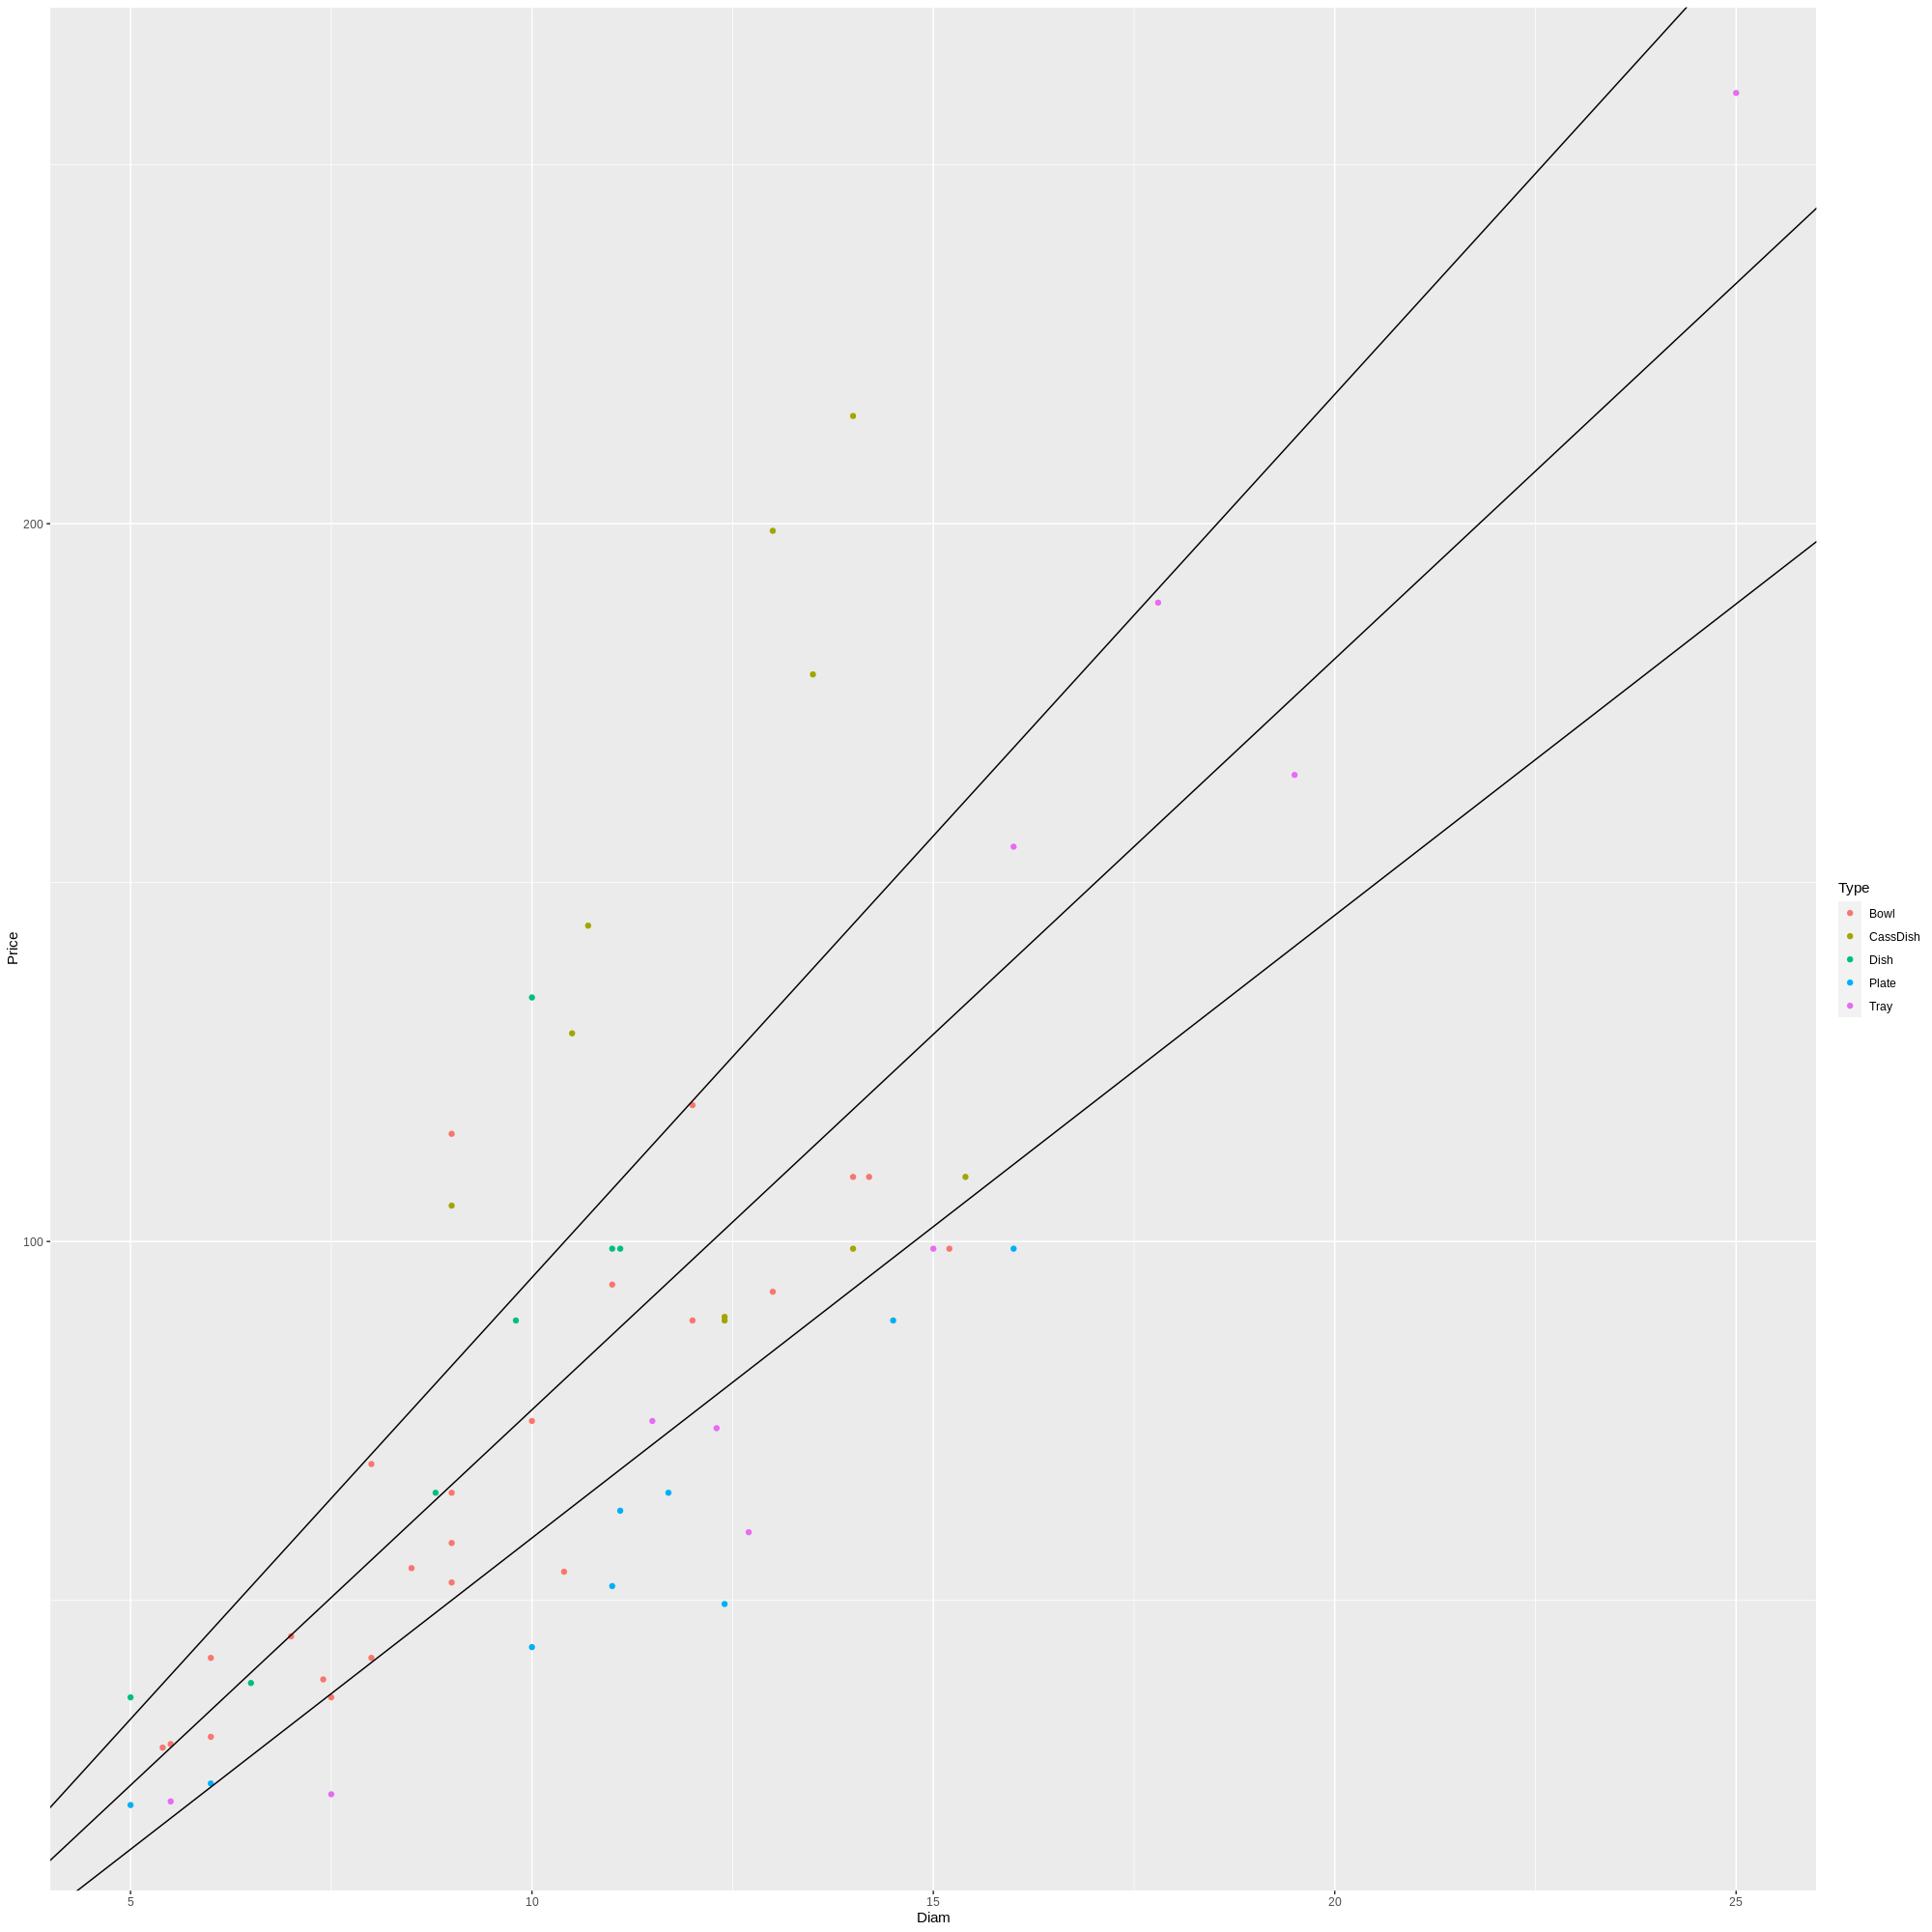

In [106]:
ggplot(nambeware, aes(x = Diam, y = Price)) + 
  geom_point(aes(colour = Type)) + 
  geom_abline(slope = coef(model)[2], intercept = coef(model)[1]) +
  geom_abline(slope = confint(model, "Diam", level = 0.95)[2], intercept = coef(model)[1], name = "Prediction") +
  geom_abline(slope = confint(model, "Diam", level = 0.95)[1], intercept = coef(model)[1]) +
  labs()